# Aumento de muertes durante la pandemia


**DEFUNCIONES GENERALES**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos desde la URL oficial
url = "http://datos.salud.gob.ar/dataset/27c588e8-43d0-411a-a40c-7ecc563c2c9f/resource/fab9e990-865c-43c4-a643-3dbc3b70a934/download/defunciones-ocurridas-y-registradas-en-la-republica-argentina-anos-2005-2021.csv"
df = pd.read_csv(url, encoding='latin1')

# Mostrar cantidad de valores nulos por columna
print("🔍 Valores nulos por columna:")
print(df.isnull().sum())

# Mostrar cantidad de filas antes de eliminar nulos
print("\n📋 Filas antes de eliminar nulos:", len(df))

# Eliminar filas que tienen nulos en columnas importantes (pero NO las de muerte materna)
df = df.dropna(subset=['cie10_clasificacion', 'jurisdicion_residencia_nombre'])

# Eliminar columnas relacionadas con muerte materna porque no las vamos a usar
df = df.drop(columns=['muerte_materna_id', 'muerte_materna_clasificacion'])

# Mostrar cantidad de filas después del filtrado
print("📉 Filas después de eliminar nulos:", len(df))
print("✅ Total de filas eliminadas:", len(df))

# Confirmar que ya no hay nulos en columnas clave
print("\n🔁 Revisión de nulos después del filtrado:")
print(df.isnull().sum())

# Ver descripción estadística de columnas numéricas
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# Ver valores únicos de la clasificación de causa de muerte
print("\n🧪 Valores únicos en 'cie10_clasificacion':")
print(df['cie10_clasificacion'].unique())

# Ver nombres de todas las columnas
print("\n🗂️ Columnas del dataset:")
print(df.columns)



/tmp/ipython-input-1-420679525.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, encoding='latin1')


🔍 Valores nulos por columna:
anio                                  0
jurisdiccion_de_residencia_id         0
jurisdicion_residencia_nombre      4782
cie10_causa_id                        0
cie10_clasificacion                1214
sexo_id                               0
Sexo                                  0
muerte_materna_id                731586
muerte_materna_clasificacion     774281
grupo_edad                            0
cantidad                              0
dtype: int64

📋 Filas antes de eliminar nulos: 778353
📉 Filas después de eliminar nulos: 772375
✅ Total de filas eliminadas: 772375

🔁 Revisión de nulos después del filtrado:
anio                             0
jurisdiccion_de_residencia_id    0
jurisdicion_residencia_nombre    0
cie10_causa_id                   0
cie10_clasificacion              0
sexo_id                          0
Sexo                             0
grupo_edad                       0
cantidad                         0
dtype: int64

📊 Estadísticas descriptivas

**Aumento significativo de defunciones durante la pandemia**

Durante 2020 y 2021, las defunciones aumentaron significativamente respecto a años anteriores debido a la pandemia de COVID-19.

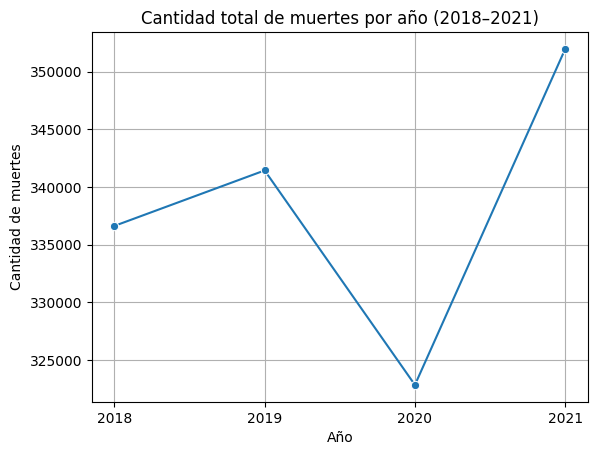


🩺 CAUSAS DE MUERTE MAS COMUNES 2018-2021:
cie10_clasificacion
Diabetes mellitus, no especificada                                                       3862
Neumonía, organismo no especificado                                                      2204
Lesión autoinfligida intencionalmente por ahorcamiento, estrangulamiento o sofocación    2116
Insuficiencia cardíaca                                                                   2057
Diabetes mellitus no insulinodependiente                                                 2041
Name: count, dtype: int64

🩺 CAUSAS DE MUERTE MAS COMUNES EN GENERAL
cie10_clasificacion
Diabetes mellitus, no especificada                                                       15950
Neumonía, organismo no especificado                                                      10217
Insuficiencia cardíaca                                                                    9414
Lesión autoinfligida intencionalmente por ahorcamiento, estrangulamiento o sofocación     862

In [ ]:
# Agrupar por año y sumar la cantidad de muertes
muertes_por_anio = df.groupby('anio')['cantidad'].sum().reset_index()

# Filtrar solo los años 2018 a 2021
muertes_2018_2021 = muertes_por_anio[
    (muertes_por_anio['anio'] >= 2018) & (muertes_por_anio['anio'] <= 2021)
].copy()

# Asegurar que 'anio' esté como entero para evitar problemas en el gráfico
muertes_2018_2021['anio'] = muertes_2018_2021['anio'].astype(int)

# Graficar
sns.lineplot(data=muertes_2018_2021, x='anio', y='cantidad', marker='o')
plt.title('Cantidad total de muertes por año (2018–2021)')
plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.xticks([2018, 2019, 2020, 2021])  # Forzar los ticks en el eje X
plt.grid()
plt.show()

# Filtrar el dataset original por los años 2018–2021
df_periodo = df[(df['anio'] >= 2018) & (df['anio'] <= 2021)]

# Contar las causas más frecuentes
contador = df_periodo['cie10_clasificacion'].value_counts()

print('\n🩺 CAUSAS DE MUERTE MAS COMUNES 2018-2021:')
print(contador.head(5))

print("\n🩺 CAUSAS DE MUERTE MAS COMUNES EN GENERAL")
print(df['cie10_clasificacion'].value_counts().head(5))


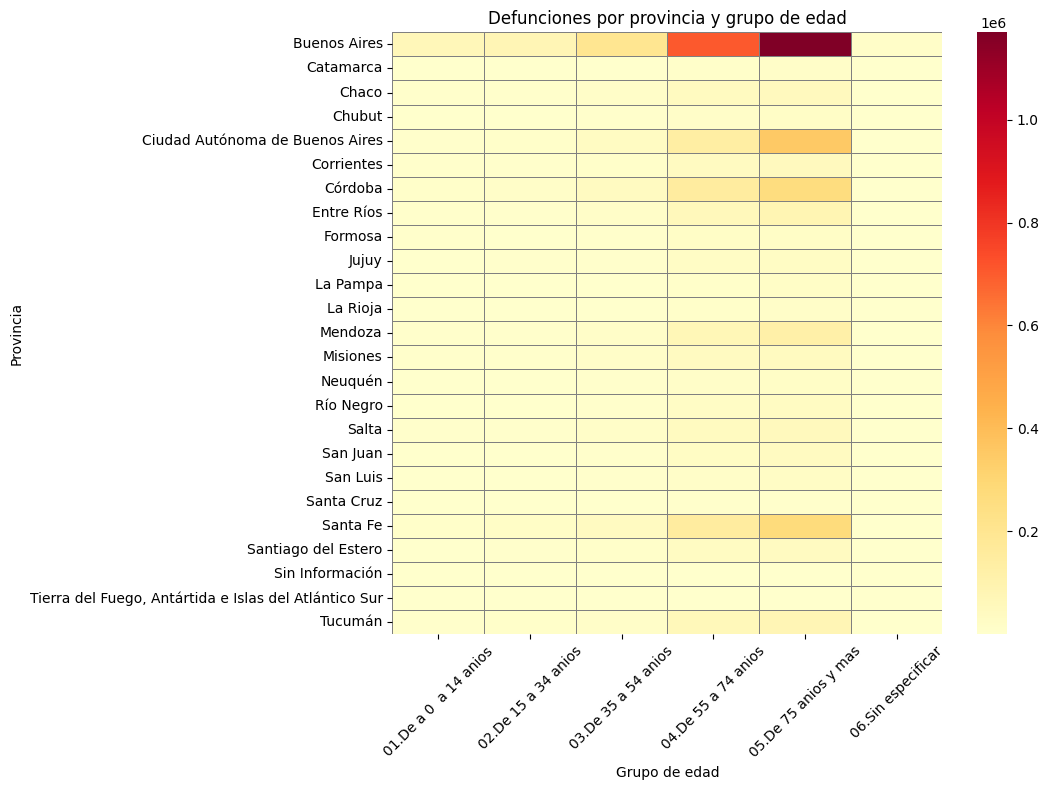

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Relacion entre variables

# --- Paso 1: Agrupar por provincia y grupo de edad ---
muertes_por_provincia_edad = df.groupby(['jurisdicion_residencia_nombre', 'grupo_edad'])['cantidad'].sum().reset_index()

# --- Paso 2: Renombrar columna para mejor visualización ---
muertes_por_provincia_edad.rename(columns={'jurisdicion_residencia_nombre': 'provincia_nombre'}, inplace=True)

# Codificar categorías con códigos estables
#for col in ['provincia_nombre', 'grupo_edad']:
    #muertes_por_provincia_edad[col] = muertes_por_provincia_edad[col].astype('category').cat.codes

# Columnas para correlación
#columnas_corr = ['provincia_nombre', 'grupo_edad', 'cantidad']

# --- Paso 3: Crear tabla pivot para heatmap ---
pivot_defunciones = muertes_por_provincia_edad.pivot(
    index='provincia_nombre',
    columns='grupo_edad',
    values='cantidad'
)

# --- Paso 4: Graficar heatmap ---
plt.figure(figsize=(11, 8))
sns.heatmap(pivot_defunciones, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Defunciones por provincia y grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Provincia')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
#plt.figure(figsize=(8, 8))
#sns.heatmap(muertes_por_provincia_edad[columnas_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Matriz de correlación - Provincia, grupo de edad y cantidad de muertes (2018–2021)')
#plt.show()

In [ ]:
df.shape # Cantidad de filas y columnas
print(df.columns)

Index(['anio', 'jurisdiccion_de_residencia_id',
       'jurisdicion_residencia_nombre', 'cie10_causa_id',
       'cie10_clasificacion', 'sexo_id', 'Sexo', 'grupo_edad', 'cantidad'],
      dtype='object')


In [ ]:
df.head().T

,0,1,2,3,4
anio,2014,2007,2008,2016,2012
jurisdiccion_de_residencia_id,34,22,82,94,90
jurisdicion_residencia_nombre,Formosa,Chaco,Santa Fe,"Tierra del Fuego, Antártida e Islas del Atlánt...",Tucumán
cie10_causa_id,P22,A09,J12,J18,P91
cie10_clasificacion,Dificultad respiratoria del recién nacido,Otras gastroenteritis y colitis de origen infe...,"Neumonía viral, no clasificada en otra parte","Neumonía, organismo no especificado",Otras alteraciones cerebrales del recién nacido
sexo_id,1,1,1,1,1
Sexo,masculino,masculino,masculino,masculino,masculino
grupo_edad,01.De a 0 a 14 anios,01.De a 0 a 14 anios,01.De a 0 a 14 anios,01.De a 0 a 14 anios,01.De a 0 a 14 anios
cantidad,22,1,1,1,1


In [ ]:
#sns.histplot(x = df['mes_anio_defuncion'], y=df['cantidad'])

KeyError: 'mes_anio_defuncion'

# Casos de covid


**Descomprimir archivo CoVid19 Casos**

In [ ]:
#url_casos = "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.zip"

#Descargar zip
!wget "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.zip"

# Mostrar archivos del zip
!unzip -l Covid19Casos.zip
# Descomprimir
!unzip Covid19Casos.zip
# Listar archivos obtenidos
!ls


--2025-06-25 00:35:05--  https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.zip
Resolving sisa.msal.gov.ar (sisa.msal.gov.ar)... 186.33.232.246
Connecting to sisa.msal.gov.ar (sisa.msal.gov.ar)|186.33.232.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 436874469 (417M) [application/zip]
Saving to: ‘Covid19Casos.zip’

Covid19Casos.zip    100%[===================>] 416.64M  17.6MB/s    in 26s     

2025-06-25 00:35:32 (16.0 MB/s) - ‘Covid19Casos.zip’ saved [436874469/436874469]

Archive:  Covid19Casos.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
6561757901  2022-06-06 03:26   Covid19Casos.csv
---------                     -------
6561757901                     1 file
Archive:  Covid19Casos.zip
  inflating: Covid19Casos.csv        
Covid19Casos.csv  Covid19Casos.zip  sample_data


In [ ]:
# Descomprimir Dosis Vacunas

# Descargar Zip
!wget https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip
# Mostrar archivos del zip
!unzip -l datos_nomivac_covid19.zip
#Descomprimir
!unzip datos_nomivac_covid19.zip
# Listar archivos obtenidos
!ls

--2025-06-25 00:40:06--  https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip
Resolving sisa.msal.gov.ar (sisa.msal.gov.ar)... 186.33.232.246
Connecting to sisa.msal.gov.ar (sisa.msal.gov.ar)|186.33.232.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2603391505 (2.4G) [application/zip]
Saving to: ‘datos_nomivac_covid19.zip’

datos_nomivac_covid 100%[===================>]   2.42G  17.5MB/s    in 2m 30s  

2025-06-25 00:42:37 (16.5 MB/s) - ‘datos_nomivac_covid19.zip’ saved [2603391505/2603391505]

Archive:  datos_nomivac_covid19.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
21212323984  2025-06-24 14:09   datos_nomivac_covid19.csv
---------                     -------
21212323984                     1 file
Archive:  datos_nomivac_covid19.zip
  inflating: datos_nomivac_covid19.csv  
Covid19Casos.csv  datos_nomivac_covid19.csv  sample_data
Covid19Casos.zip  datos_nomivac_covid19.zip


In [ ]:
import pandas as pd
# Desconmprimir
!unzip Covid19Casos.zip

# Seleccionar columnas clave
columns = ['fecha_diagnostico', 'sexo', 'edad', 'residencia_provincia_nombre', 'clasificacion_resumen', 'fecha_fallecimiento']

# Leer una muestra de 100.000 registros
df_sample = pd.read_csv('Covid19Casos.csv', usecols=columns, nrows=100000)
print(f'Stats primeros 100000 registros: {df_sample.columns.tolist()}')

# Revisar valores faltantes
print("Valores nulos por columna:")
print(df_sample.isnull().sum())

print("Porcentaje:")
print((df_sample.isnull().sum() / len(df_sample)) * 100)

# Contar casos y muertes usando chunks
total_casos = 0
total_fallecidos = 0
for chunk in pd.read_csv('Covid19Casos.csv', usecols=columns, chunksize=100000):
    total_casos += len(chunk)
    total_fallecidos += chunk['fecha_fallecimiento'].notna().sum()

print(f"\n✅ Total de casos: {total_casos}")
print(f"☠️ Total de muertes por COVID: {total_fallecidos}")

Archive:  Covid19Casos.zip
replace Covid19Casos.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 🔽 ACA EMPIEZA EL NUEVO BLOQUE PARA HACER LO MISMO QUE CON DEFUNCIONES
# Copia para codificación
df_encoded = df_sample.copy()

# Crear columna fallecido (1 si tiene fecha de fallecimiento)
df_sample['fallecido'] = df_sample['fecha_fallecimiento'].notna().astype(int)

# Crear grupo de edad personalizado
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df_sample['grupo_edad'] = pd.cut(df_sample['edad'], bins=bins, labels=labels, right=True)

# Limpiar provincia y asegurar grupo_edad no tenga nulos
df_sample['residencia_provincia_nombre'] = df_sample['residencia_provincia_nombre'].str.strip().str.upper()
df_sample = df_sample.dropna(subset=['grupo_edad', 'residencia_provincia_nombre'])

# Agrupar por provincia y grupo de edad, sumar fallecidos
covid_por_provincia_edad = df_sample.groupby(['residencia_provincia_nombre', 'grupo_edad'])['fallecido'].sum().reset_index()


# Renombrar para visualización
covid_por_provincia_edad.rename(columns={'residencia_provincia_nombre': 'provincia_nombre'}, inplace=True)

# Codificar para correlación
covid_por_provincia_edad['provincia_code'] = covid_por_provincia_edad['provincia_nombre'].astype('category').cat.codes
covid_por_provincia_edad['grupo_edad_code'] = covid_por_provincia_edad['grupo_edad'].astype('category').cat.codes

# Matriz de correlación
#plt.figure(figsize=(8, 8))
#sns.heatmap(covid_por_provincia_edad[['provincia_code', 'grupo_edad_code', 'fallecido']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Matriz de correlación - Fallecimientos por COVID según provincia y grupo de edad')
#plt.show()

/tmp/ipython-input-13-4276511042.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  covid_por_provincia_edad = df_sample.groupby(['residencia_provincia_nombre', 'grupo_edad'])['fallecido'].sum().reset_index()


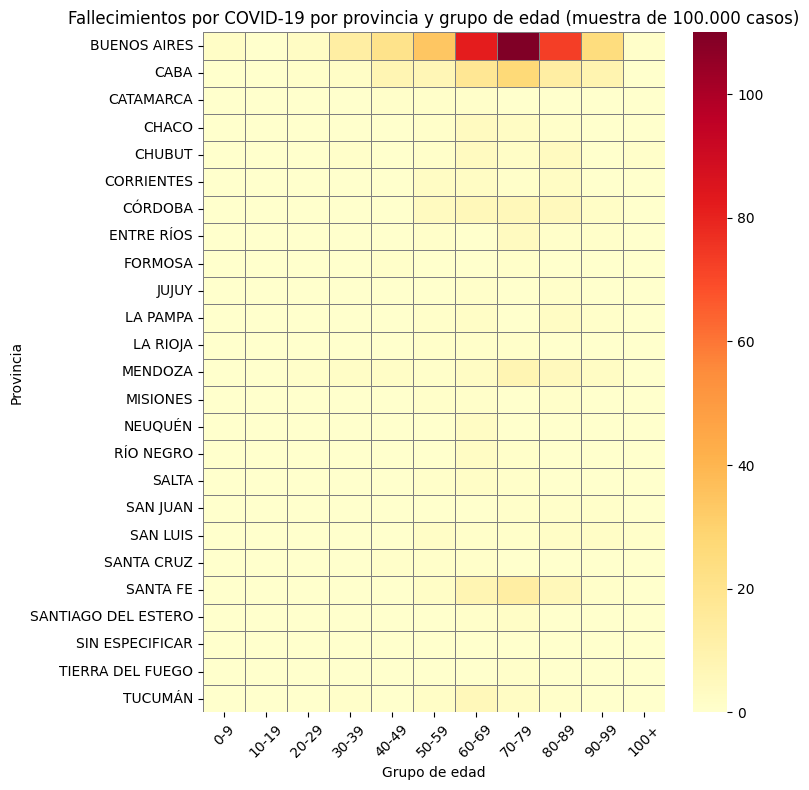

In [ ]:
# 📊 Crear tabla pivot para el heatmap visual
pivot_covid = covid_por_provincia_edad.pivot(index='provincia_nombre', columns='grupo_edad', values='fallecido')

# 🖼️ Graficar heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_covid, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Fallecimientos por COVID-19 por provincia y grupo de edad (muestra de 100.000 casos)')
plt.xlabel('Grupo de edad')
plt.ylabel('Provincia')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Dosis de vacunas

**DATASET 3: DOSIS DE VACUNAS**


In [ ]:
import pandas as pd
import os


!wget https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip

# Descomprimir
!unzip datos_nomivac_covid19.zip
os.listdir()

--2025-06-24 21:48:01--  https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip
Resolving sisa.msal.gov.ar (sisa.msal.gov.ar)... 186.33.232.246
Connecting to sisa.msal.gov.ar (sisa.msal.gov.ar)|186.33.232.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2603391505 (2.4G) [application/zip]
Saving to: ‘datos_nomivac_covid19.zip’

datos_nomivac_covid 100%[===================>]   2.42G  15.2MB/s    in 2m 49s  

2025-06-24 21:50:51 (14.7 MB/s) - ‘datos_nomivac_covid19.zip’ saved [2603391505/2603391505]

Archive:  datos_nomivac_covid19.zip
  inflating: datos_nomivac_covid19.csv  


['.config',
 'Covid19Casos.zip',
 'datos_nomivac_covid19.csv',
 'Covid19Casos.csv',
 'datos_nomivac_covid19.zip',
 'sample_data']

In [ ]:
for chunk in pd.read_csv("datos_nomivac_covid19.csv", nrows=5).columns:
    print(repr(chunk))

'sexo'
'grupo_etario'
'jurisdiccion_residencia'
'jurisdiccion_residencia_id'
'depto_residencia'
'depto_residencia_id'
'jurisdiccion_aplicacion'
'jurisdiccion_aplicacion_id'
'depto_aplicacion'
'depto_aplicacion_id'
'fecha_aplicacion'
'vacuna'
'cod_dosis_generica'
'nombre_dosis_generica'
'condicion_aplicacion'
'orden_dosis'
'lote_vacuna'
'id_persona_dw'


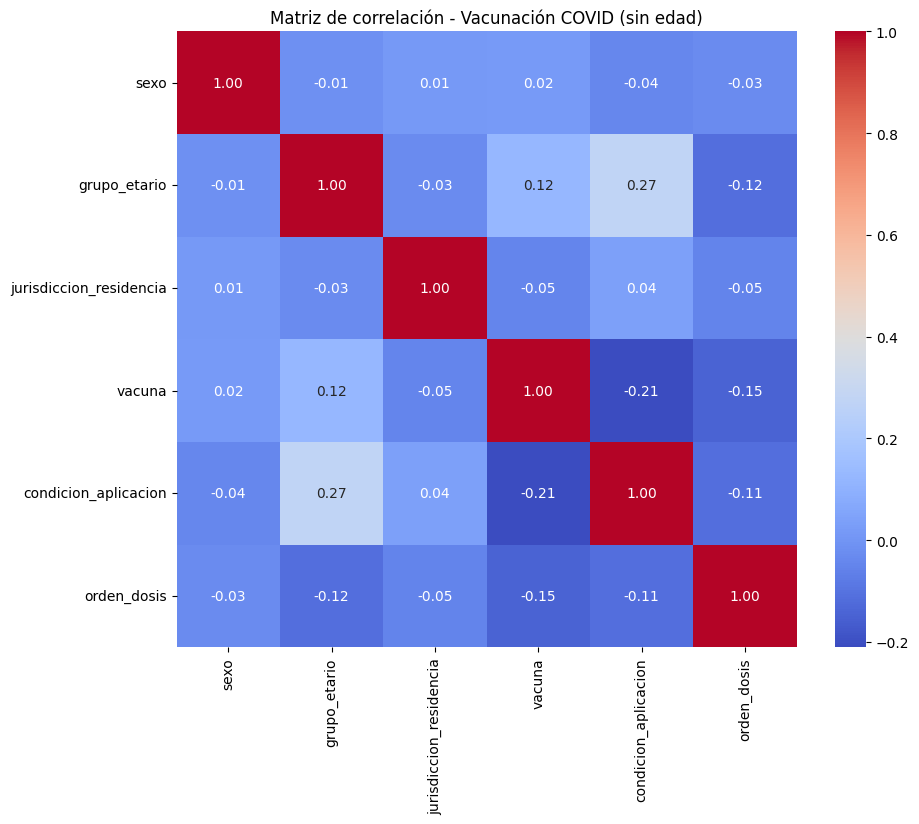

In [ ]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

columnas = ['sexo', 'grupo_etario', 'jurisdiccion_residencia', 'vacuna', 'orden_dosis', 'condicion_aplicacion']
df = pd.read_csv("datos_nomivac_covid19.csv", usecols=columnas, encoding='latin1', nrows=100000)


df = df.dropna()

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - Vacunación COVID (sin edad)')
plt.show()


# Defunciones y Casos COVID19


/tmp/ipython-input-16-1274713679.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  covid_por_provincia_edad = df_sample.groupby(['residencia_provincia_nombre', 'grupo_edad'])['fallecido'].sum().reset_index()


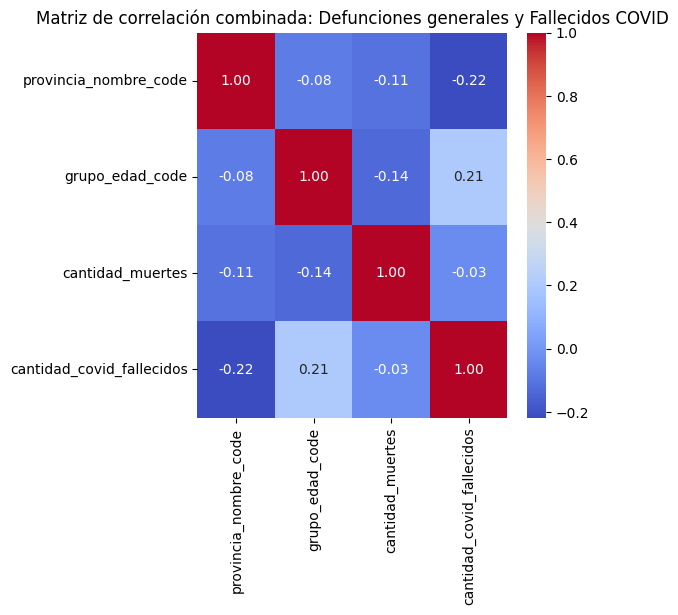

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Dataset 1: Defunciones generales ---
muertes_por_provincia_edad = df.groupby(['jurisdicion_residencia_nombre', 'grupo_edad'])['cantidad'].sum().reset_index()
muertes_por_provincia_edad.rename(columns={
    'jurisdicion_residencia_nombre': 'provincia_nombre',
    'cantidad': 'cantidad_muertes'
}, inplace=True)

# Codificar grupo_edad como categoría si no está codificada
if muertes_por_provincia_edad['grupo_edad'].dtype.name == 'category':
    muertes_por_provincia_edad['grupo_edad'] = muertes_por_provincia_edad['grupo_edad'].astype(str)

# --- Dataset 2: Fallecimientos por COVID ---
df_sample['fallecido'] = df_sample['fecha_fallecimiento'].notna().astype(int)

bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df_sample['grupo_edad'] = pd.cut(df_sample['edad'], bins=bins, labels=labels, right=True)

df_sample['residencia_provincia_nombre'] = df_sample['residencia_provincia_nombre'].str.strip().str.upper()
df_sample = df_sample.dropna(subset=['grupo_edad', 'residencia_provincia_nombre'])

covid_por_provincia_edad = df_sample.groupby(['residencia_provincia_nombre', 'grupo_edad'])['fallecido'].sum().reset_index()
covid_por_provincia_edad.rename(columns={
    'residencia_provincia_nombre': 'provincia_nombre',
    'fallecido': 'cantidad_covid_fallecidos'
}, inplace=True)

# --- Unir ambos datasets por provincia y grupo_edad ---
df_combinado = pd.merge(muertes_por_provincia_edad,
                        covid_por_provincia_edad,
                        how='outer',
                        on=['provincia_nombre', 'grupo_edad'])

# Rellenar NaN con 0
df_combinado['cantidad_muertes'] = df_combinado['cantidad_muertes'].fillna(0)
df_combinado['cantidad_covid_fallecidos'] = df_combinado['cantidad_covid_fallecidos'].fillna(0)

# Codificar variables categóricas a numéricas
for col in ['provincia_nombre', 'grupo_edad']:
    df_combinado[col + '_code'] = df_combinado[col].astype('category').cat.codes

# Columnas para matriz de correlación
columnas_corr = ['provincia_nombre_code', 'grupo_edad_code', 'cantidad_muertes', 'cantidad_covid_fallecidos']

# Graficar matriz de correlación
plt.figure(figsize=(5, 5))
sns.heatmap(df_combinado[columnas_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación combinada: Defunciones generales y Fallecidos COVID')
plt.show()


si en ciertas provincias y grupos de edad la cantidad general de muertes es alta pero la cantidad de muertes por COVID es baja (o viceversa), la correlación puede ser negativa.

# Provincias con mas casos


**Impacto geográfico diferencial de la pandemia**

Algunas provincias muestran un mayor exceso de defunciones relativo en comparación con su tasa de contagios, lo cual podría indicar desigualdades en el acceso a servicios de salud

In [ ]:
import pandas as pd

casos_por_provincia = {}
for chunk in pd.read_csv('Covid19Casos.csv', chunksize=100000,encoding='latin1'):
    if 'residencia_provincia_nombre' in chunk.columns:
        conteo = chunk['residencia_provincia_nombre'].value_counts()

        # Sumar los casos al diccionario
        for provincia, cantidad in conteo.items():
            if provincia in casos_por_provincia:
                casos_por_provincia[provincia] += cantidad
            else:
                casos_por_provincia[provincia] = cantidad

#  Ordenar y mostrar
df_resultado = pd.DataFrame(list(casos_por_provincia.items()), columns=['Provincia', 'Total de casos'])
df_resultado = df_resultado.sort_values(by='Total de casos', ascending=False)

print(df_resultado)

/tmp/ipython-input-28-2047701586.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', chunksize=100000,encoding='latin1'):
/tmp/ipython-input-28-2047701586.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', chunksize=100000,encoding='latin1'):
/tmp/ipython-input-28-2047701586.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', chunksize=100000,encoding='latin1'):
/tmp/ipython-input-28-2047701586.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', chunksize=100000,encoding='latin1'):
/tmp/ipython-input-28-2047701586.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option

              Provincia  Total de casos
0          Buenos Aires        10387034
1                  CABA         5490593
2              CÃ³rdoba         3292951
3              Santa Fe         1799863
5              TucumÃ¡n         1138575
4               Mendoza          808411
16              Formosa          797429
8                 Chaco          638818
7            Corrientes          496192
13             San Juan          458165
10                Salta          451394
9           Entre RÃ­os          415932
6              San Luis          399904
15  Santiago del Estero          382897
17           RÃ­o Negro          363024
11             La Pampa          358381
21                Jujuy          354950
19             NeuquÃ©n          353426
14           Santa Cruz          321612
12               Chubut          298627
18            Catamarca          278277
22             Misiones          208396
24      SIN ESPECIFICAR          187778
20             La Rioja          179394


In [ ]:
import pandas as pd

# Diccionarios para acumular
casos_por_provincia = {}
muertes_por_provincia = {}


for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
    if 'residencia_provincia_nombre' in chunk.columns and 'fallecido' in chunk.columns:
        # casos por provincia
        casos = chunk['residencia_provincia_nombre'].value_counts()
        for provincia, cantidad in casos.items():
            casos_por_provincia[provincia] = casos_por_provincia.get(provincia, 0) + cantidad

        # Cant muertes por provincia
        fallecidos_si = chunk[chunk['fallecido'].str.upper() == 'SI']
        muertes = fallecidos_si['residencia_provincia_nombre'].value_counts()
        for provincia, cantidad in muertes.items():
            muertes_por_provincia[provincia] = muertes_por_provincia.get(provincia, 0) + cantidad

# Crear Dataframe
data = []
for provincia in casos_por_provincia:
    total_casos = casos_por_provincia.get(provincia, 0)
    total_muertes = muertes_por_provincia.get(provincia, 0)
    tasa_lethal = (total_muertes / total_casos) * 100 if total_casos > 0 else 0
    data.append([provincia, total_casos, total_muertes, tasa_lethal])

df_letalidad = pd.DataFrame(data, columns=['Provincia', 'Casos Confirmados', 'Muertes', 'Tasa de Letalidad (%)'])
df_letalidad = df_letalidad.sort_values(by='Tasa de Letalidad (%)', ascending=False)

print(df_letalidad)


/tmp/ipython-input-8-2065918581.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-8-2065918581.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-8-2065918581.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-8-2065918581.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-8-2065918581.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option 

              Provincia  Casos Confirmados  Muertes  Tasa de Letalidad (%)
10                Salta             451394     4339               0.961245
9           Entre RÃ­os             415932     3479               0.836435
19             NeuquÃ©n             353426     2696               0.762819
17           RÃ­o Negro             363024     2725               0.750639
4               Mendoza             808411     6062               0.749866
0          Buenos Aires           10387034    73237               0.705081
23     Tierra del Fuego             109969      673               0.611991
12               Chubut             298627     1827               0.611800
20             La Rioja             179394     1083               0.603699
3              Santa Fe            1799863    10266               0.570377
22             Misiones             208396     1078               0.517284
8                 Chaco             638818     3180               0.497794
21                Jujuy  

In [ ]:
import pandas as pd

chunk = pd.read_csv('datos_nomivac_covid19.csv', encoding='latin1', nrows=5)

print(chunk.columns)


Index(['sexo', 'grupo_etario', 'jurisdiccion_residencia',
       'jurisdiccion_residencia_id', 'depto_residencia', 'depto_residencia_id',
       'jurisdiccion_aplicacion', 'jurisdiccion_aplicacion_id',
       'depto_aplicacion', 'depto_aplicacion_id', 'fecha_aplicacion', 'vacuna',
       'cod_dosis_generica', 'nombre_dosis_generica', 'condicion_aplicacion',
       'orden_dosis', 'lote_vacuna', 'id_persona_dw'],
      dtype='object')


In [ ]:
from collections import defaultdict
import pandas as pd

vacunados_por_provincia = defaultdict(int)
vacunados_por_provincia_mes = defaultdict(lambda: defaultdict(int))

for chunk in pd.read_csv('datos_nomivac_covid19.csv', encoding='latin1', chunksize=100000):
    if 'jurisdiccion_residencia' in chunk.columns and 'fecha_aplicacion' in chunk.columns:
        # Eliminar registros sin fecha
        chunk = chunk.dropna(subset=['fecha_aplicacion'])

        # Convertir fecha a año y mes
        chunk['fecha_aplicacion'] = pd.to_datetime(chunk['fecha_aplicacion'], errors='coerce')
        chunk = chunk.dropna(subset=['fecha_aplicacion'])
        chunk['mes_aplicacion'] = chunk['fecha_aplicacion'].dt.to_period('M').astype(str)

        # Contar vacunados por provincia
        prov_counts = chunk['jurisdiccion_residencia'].value_counts()
        for prov, cant in prov_counts.items():
            vacunados_por_provincia[prov] += cant

        # Cantidad vacunados por provincia y mes
        grupo = chunk.groupby(['jurisdiccion_residencia', 'mes_aplicacion']).size()
        for (prov, mes), cant in grupo.items():
                vacunados_por_provincia_mes[prov][mes] += cant

# Dataframe
df_vac_total = pd.DataFrame(list(vacunados_por_provincia.items()), columns=['Provincia', 'Vacunados Totales'])
df_vac_total = df_vac_total.sort_values(by='Vacunados Totales', ascending=False)

print(df_vac_total.head(10))


              Provincia  Vacunados Totales
0          Buenos Aires           44705589
1                  CABA           10820969
4              Santa Fe            9719803
2              CÃ³rdoba            9292844
3               Mendoza            4769329
7              TucumÃ¡n            3921519
15          Entre RÃ­os            3291218
11                Salta            3046972
6            Corrientes            2948986
14  Santiago del Estero            2532966


Combinar datasets de letalidad y total de vacunados para ver la relación entre las vacunas y las muertes

In [ ]:
# COmbinar datasets letalidad y vacunas

df_combinado = pd.merge(df_letalidad, df_vac_total, on='Provincia', how='inner')
print(df_combinado.sort_values(by='Tasa de Letalidad (%)', ascending=False).head(10))


          Provincia  Casos Confirmados  Muertes  Tasa de Letalidad (%)  \
0             Salta             451394     4339               0.961245   
1       Entre RÃ­os             415932     3479               0.836435   
2          NeuquÃ©n             353426     2696               0.762819   
3        RÃ­o Negro             363024     2725               0.750639   
4           Mendoza             808411     6062               0.749866   
5      Buenos Aires           10387034    73237               0.705081   
6  Tierra del Fuego             109969      673               0.611991   
7            Chubut             298627     1827               0.611800   
8          La Rioja             179394     1083               0.603699   
9          Santa Fe            1799863    10266               0.570377   

   Vacunados Totales  
0            3046972  
1            3291218  
2            1746265  
3            1921324  
4            4769329  
5           44705589  
6             464226  
7

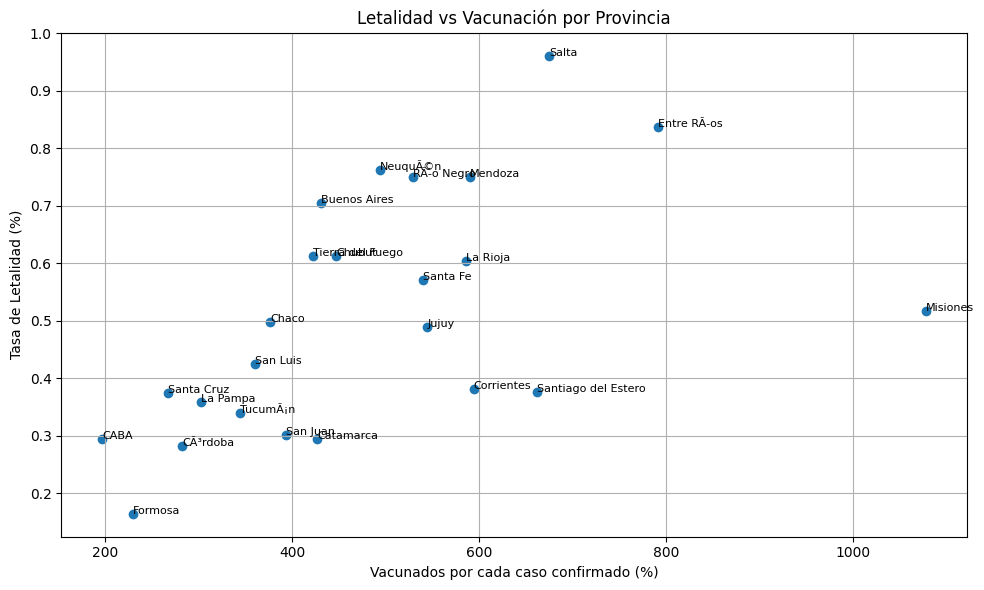

In [ ]:
#Graficar
import matplotlib.pyplot as plt
# Porcentaje de vacunados
df_combinado['Vacunados por caso (%)'] = (df_combinado['Vacunados Totales'] / df_combinado['Casos Confirmados']) * 100


plt.figure(figsize=(10,6))
plt.scatter(df_combinado['Vacunados por caso (%)'], df_combinado['Tasa de Letalidad (%)'])

for i, row in df_combinado.iterrows():
    plt.text(row['Vacunados por caso (%)'], row['Tasa de Letalidad (%)'], row['Provincia'], fontsize=8)

plt.xlabel('Vacunados por cada caso confirmado (%)')
plt.ylabel('Tasa de Letalidad (%)')
plt.title('Letalidad vs Vacunación por Provincia')
plt.grid(True)
plt.tight_layout()
plt.show()

Algunas provincias como Salta y Entre Ríos presenta alta tasa de letalidad a pesar de las vacunas.

In [ ]:
# Cantidad de internados por provincia

import pandas as pd

internados_por_provincia = {}

for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
    if 'residencia_provincia_nombre' in chunk.columns and 'fecha_internacion' in chunk.columns:
        internados = chunk.dropna(subset=['fecha_internacion'])
        conteo = internados['residencia_provincia_nombre'].value_counts()

        for provincia, cantidad in conteo.items():
            internados_por_provincia[provincia] = internados_por_provincia.get(provincia, 0) + cantidad

# Convertimos a DataFrame
df_internados = pd.DataFrame(list(internados_por_provincia.items()), columns=['Provincia', 'Internados'])
df_internados = df_internados.sort_values(by='Internados', ascending=False)

print(df_internados.head(10))



/tmp/ipython-input-4-839957140.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-4-839957140.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-4-839957140.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-4-839957140.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-4-839957140.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on im

       Provincia  Internados
0   Buenos Aires      242416
1           CABA       78100
2       CÃ³rdoba       31323
3       Santa Fe       27392
5    Entre RÃ­os       16414
7          Salta       15044
9       NeuquÃ©n       14842
4        Mendoza       14374
6          Chaco        9895
11    RÃ­o Negro        9282


In [ ]:
# Edades
import pandas as pd

suma_edades = {}
cuenta_edades= {}
for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
    if 'residencia_provincia_nombre' in chunk.columns and 'edad' in chunk.columns:
      chunk = chunk.dropna(subset=['edad'])

      for provincia, grupo in chunk.groupby('residencia_provincia_nombre'):
        suma = grupo['edad'].sum()
        cantidad = grupo['edad'].count()

        suma_edades[provincia] = suma_edades.get(provincia, 0) + suma
        cuenta_edades[provincia] = cuenta_edades.get(provincia, 0) + cantidad

edad_promedio = {prov: suma_edades[prov] / cuenta_edades[prov] for prov in suma_edades}

# Convertir a DataFrame
df_edades = pd.DataFrame(list(edad_promedio.items()), columns=['Provincia', 'Edad Promedio'])
df_edades = df_edades.sort_values(by='Edad Promedio', ascending=False)

print(df_edades.head(10))

/tmp/ipython-input-3-2627416495.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-3-2627416495.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-3-2627416495.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-3-2627416495.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('Covid19Casos.csv', encoding='latin1', chunksize=100000):
/tmp/ipython-input-3-2627416495.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option 

              Provincia  Edad Promedio
1                  CABA      39.821993
21             Santa Fe      39.768542
4                Chubut      39.755745
9                 Jujuy      39.465178
12              Mendoza      39.416895
13             Misiones      39.348906
7           Entre RÃ­os      39.036595
17                Salta      39.026149
15           RÃ­o Negro      39.014332
22  Santiago del Estero      38.989586


**Combinar los datos de internacion con las muertes para ver si hubo acceso a los sistemas de slaud**

In [ ]:
print(df_combinado.columns)
print(df_internados.columns)
df_combinado = df_combinado.drop(columns=['Internados', 'Internados_x', 'Internados_y'], errors='ignore')


Index(['Provincia', 'Casos Confirmados', 'Muertes', 'Tasa de Letalidad (%)',
       'Vacunados Totales', 'Vacunados por caso (%)', 'Internados_x',
       'Internados por caso (%)', 'Internados_y', 'Internados'],
      dtype='object')
Index(['Provincia', 'Internados'], dtype='object')


In [ ]:
# Unir los datos
df_combinado = df_combinado.merge(df_internados, on='Provincia', how='left')

# Calcular porcentaje de internacion sobre casos
df_combinado['Internados por caso (%)'] = (df_combinado['Internados'] / df_combinado['Casos Confirmados']) * 100

# Ordenar
df_combinado = df_combinado.sort_values(by='Internados por caso (%)', ascending=False)

print(df_combinado[['Provincia', 'Casos Confirmados', 'Muertes', 'Tasa de Letalidad (%)', 'Vacunados Totales', 'Internados', 'Internados por caso (%)']].head(10))


          Provincia  Casos Confirmados  Muertes  Tasa de Letalidad (%)  \
0          NeuquÃ©n             353426     2696               0.762819   
1       Entre RÃ­os             415932     3479               0.836435   
2             Salta             451394     4339               0.961245   
3        RÃ­o Negro             363024     2725               0.750639   
4      Buenos Aires           10387034    73237               0.705081   
5          Misiones             208396     1078               0.517284   
6           Mendoza             808411     6062               0.749866   
7          La Pampa             358381     1288               0.359394   
8  Tierra del Fuego             109969      673               0.611991   
9             Chaco             638818     3180               0.497794   

   Vacunados Totales  Internados  Internados por caso (%)  
0            1746265       14842                 4.199465  
1            3291218       16414                 3.946318  
2    

In [ ]:
# Ver en que momento se empezaron a vacunar por cada provincia
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

provincias_a_comparar = ['Salta', 'Entre Ríos', 'Córdoba', 'CABA']

vac_por_mes = defaultdict(lambda: defaultdict(int))

for chunk in pd.read_csv('datos_nomivac_covid19.csv', encoding='latin1', chunksize=100000):
    chunk.columns = chunk.columns.str.strip()
    if 'jurisdiccion_residencia' in chunk.columns and 'fecha_aplicacion' in chunk.columns:
        chunk = chunk.dropna(subset=['fecha_aplicacion'])
        chunk['fecha_aplicacion'] = pd.to_datetime(chunk['fecha_aplicacion'], errors='coerce')
        chunk = chunk.dropna(subset=['fecha_aplicacion'])
        chunk['mes'] = chunk['fecha_aplicacion'].dt.to_period('M').astype(str)

        # Flitrar provincias
        chunk = chunk[chunk['jurisdiccion_residencia'].isin(provincias_a_comparar)]

        # Gruoupby
        try:
          grupo = chunk.groupby(['jurisdiccion_residencia', 'mes']).size()
          for (prov, mes), cant in grupo.items():
            vac_por_mes[prov][mes] += cant
        except KeyError as e:
          print('Error en groupby ', e)
df = pd.DataFrame(vac_por_mes).fillna(0).sort_index()
df = df.cumsum()

# Graficar
plt.figure(figsize=(14,8))
for provincia in provincias_a_comparar:
  plt.plot(df.index, df[provincia], label=prov)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Vacunacion acumulada por provincia')
plt.xlabel('mes')
plt.ylabel('cant acumulada de vacunas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.